<a href="https://colab.research.google.com/github/girlwholoved/Task2-HeartDiseaseDataset/blob/main/HDD_Irma_Nurmalia_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation and Importing**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.3 MB/s eta 0:00:00


In [ ]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from catboost import CatBoostClassifier, Pool, cv

# Let's ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/#MSIB/Startup Campus/data set - SC/heart.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Data Preparation**

Peserta dapat memilih dataset yang telah disediakan. Siapkan data berdasarkan langkah berikut:
1. Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.
2. Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.
3. Outlier: Memeriksa outlier dan menangani outlier jika ada.
4. Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.
5. Feature encoding: Melakukan feature encoding jika diperlukan.

Dataset dapat diunduh pada link berikut: [Health Case Study](https://drive.google.com/file/d/1bT3_lIwUoNIXd4S-E8J4L2IDJlrEjMyl/view?usp=sharing)


## 1. Missing Value

<Axes: >

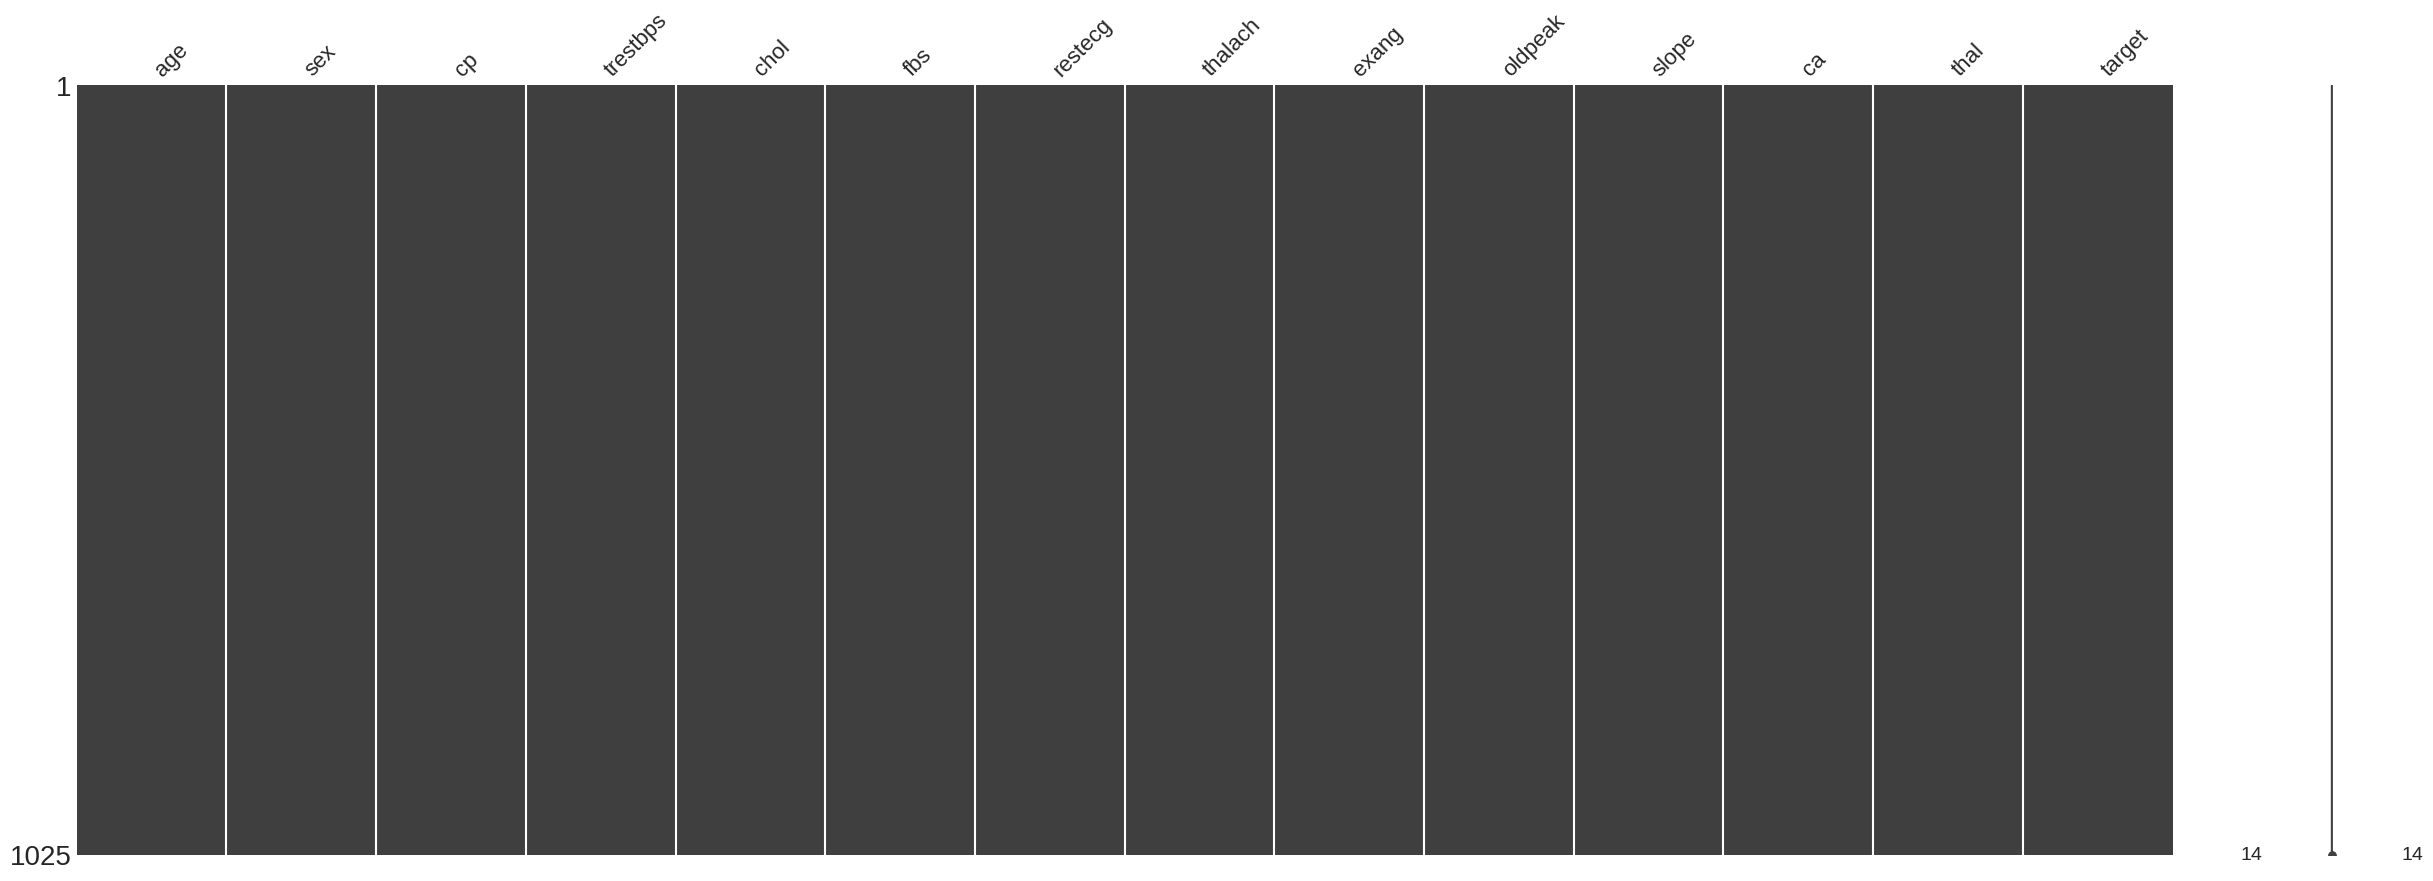

In [ ]:
# Plot graphic of missing values
missingno.matrix(data, figsize = (30,10))

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 2. Duplicate Value

In [ ]:
# memeriksa data duplikat
duplikat = data.duplicated()
duplikat

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
# hapus data duplikat
df = data.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
# memeriksa data duplikat
duplikat = df.duplicated()
duplikat

0      False
1      False
2      False
3      False
4      False
       ...  
723    False
733    False
739    False
843    False
878    False
Length: 302, dtype: bool

## 3. Outlier

Meskipun terdapat beberapa **outlier** di beberapa kolom, data tersebut **tidak perlu dihapus atau ditangani**. Menurut saya, tiap data dalam dataset ini penting karena merujuk pada kesehatan seseorang, yang mana hal tersebut dipengaruhi oleh beberapa faktor yang bisa saja berbeda antara orang satu dengan lainnya.

<Axes: ylabel='age'>

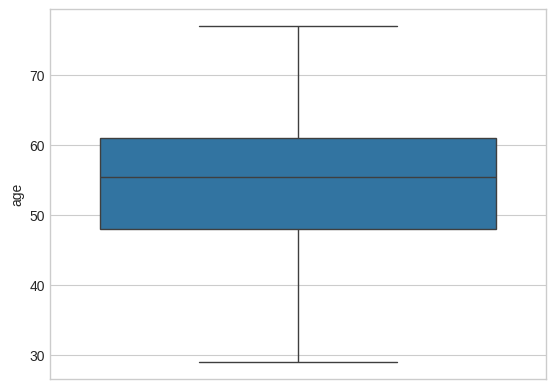

In [ ]:
# Memeriksa outlier
sns.boxplot(df['age'])

<Axes: ylabel='trestbps'>

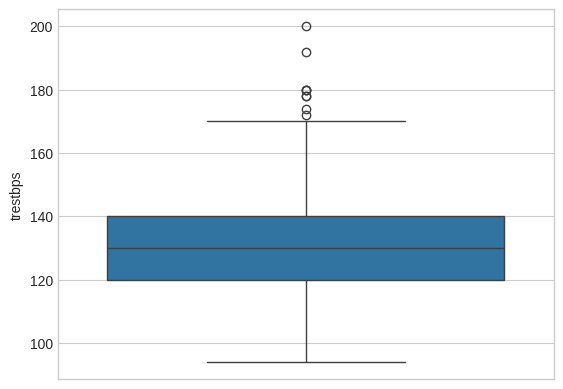

In [ ]:
# Memeriksa outlier
sns.boxplot(df['trestbps'])

<Axes: ylabel='chol'>

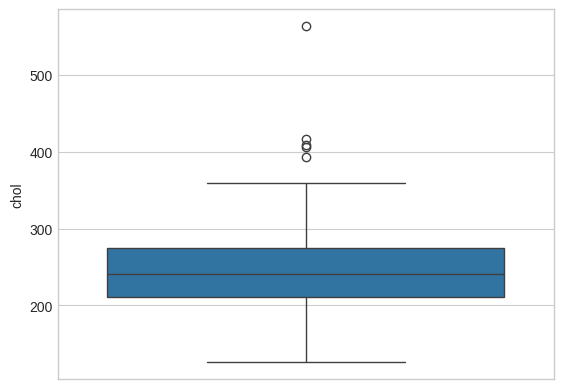

In [ ]:
sns.boxplot(df['chol'])

<Axes: ylabel='thalach'>

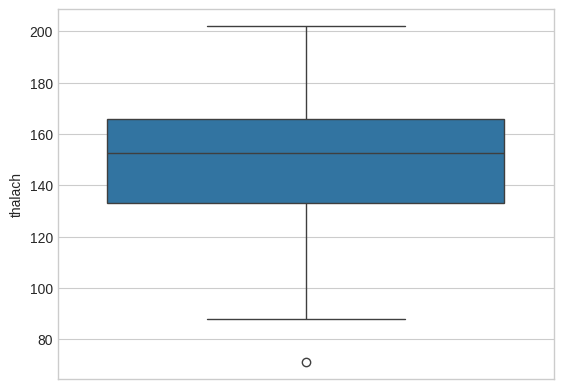

In [ ]:
sns.boxplot(df['thalach'])

<Axes: ylabel='oldpeak'>

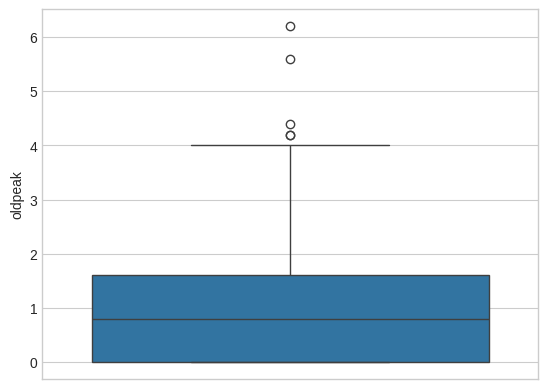

In [ ]:
sns.boxplot(df['oldpeak'])

## 4. Imbalance data

In [ ]:
# Imbalance Data
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

Memisahkan jenis kelamin male = 1 dan female = 0

In [ ]:
df_male = df[df['sex']==1]
df_male

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
720,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
df_female = df[df['sex']==0]
df_female

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
708,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1


**Down-Sample Majority Class**

Metode ini menurut saya lebih baik dibandingkan Up-Sample karena jika memakai metode tersebut akan terjadi banyak data duplikat khususnya pada kolom sex==0 (female)

In [ ]:
from sklearn.utils import resample

df_male_dwsampled = resample(df_male, n_samples=len(df_female)) # downsampe sebanyak data female
df_male_dwsampled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
116,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
107,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
237,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
98,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
154,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0


In [ ]:
# gabungkan data laki-laki (down-sample) dan perempuan
df_downsampled = pd.concat([df_male_dwsampled, df_female])
df_downsampled['sex'].value_counts()

1    96
0    96
Name: sex, dtype: int64

In [ ]:
df_downsampled #dataset baru ini akan digunakan sebagai train test data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
116,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
107,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
237,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
708,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1


In [ ]:
female = df_downsampled[(df_downsampled['target'] == 1) & (df_downsampled['sex'] == 0)]
female

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
225,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
193,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
191,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
616,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
231,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


## 5. Feature Encoding

Pada dataset ini tidak diperlukan feature encoding karena semua data numerik alias tidak ada data kategorikal.

# **Exploratory Data Analysis (EDA)**

Menggunakan dataset yang sama, Peserta diminta untuk:
1. Mengelaborasi features dan tipe data (nominal, ordinal, numerical)
2. Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

Mean : rata-rata yang diperoleh dari jumlah semua data dibagi dengan banyak data

Median : pemusatan data yang berdasarkan nilai tengahnya

Modus : nilai dengan frekunsi terbanyak dalam data

3. Menemukan dan mendeskripsikan statistical five summaries
4. Mendeskripsikan distribusi data

**Data descriptions**

**age** = umur pasien

**sex** = jenis kelamin (0 = female, 1 = male)

**cp** = chest pain type (0,1,2,3)

**trestbps** = resting blood pressure

**chol** = serum cholestrerol (mg/dl)

**fbs** = fasting blood sugar yang nilainya > 120 mg/dl (0 = false, 1 = true)

**restcg** = resting electrocardiographic results (0,1,2)

**thalach** = maximum heart rate achieved

**exang** = exercise induced angina (0 = no, 1 = yes)

**oldpeak** = ST depression induced by exercise relative to rest (0 - 6.2)

**slope** = the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)

**ca** = number of major vessels colored by flouroscopy (0 -3 )

**thal** = blood disorder called thalassemia (0 = normal, 1 = fixed defect, 2 = reversable defect)

**target** = the presence of heart disease in the patient (0 = no, 1 = disease)



In [ ]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 85 to 733
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       192 non-null    int64  
 1   sex       192 non-null    int64  
 2   cp        192 non-null    int64  
 3   trestbps  192 non-null    int64  
 4   chol      192 non-null    int64  
 5   fbs       192 non-null    int64  
 6   restecg   192 non-null    int64  
 7   thalach   192 non-null    int64  
 8   exang     192 non-null    int64  
 9   oldpeak   192 non-null    float64
 10  slope     192 non-null    int64  
 11  ca        192 non-null    int64  
 12  thal      192 non-null    int64  
 13  target    192 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 22.5 KB


In [ ]:
df_downsampled.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,54.963542,0.500000,0.932292,132.182292,252.390625,0.161458,0.531250,149.156250,0.312500,0.973437,1.437500,0.625000,2.312500,0.578125
std,8.771904,0.501307,0.997693,18.143786,54.238648,0.368915,0.540566,22.259925,0.464724,1.207469,0.602134,0.918113,0.602134,0.495150
min,29.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,0.500000,1.000000,130.000000,244.500000,0.000000,1.000000,154.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,282.250000,0.000000,1.000000,164.250000,1.000000,1.500000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## To perform our data analysis, let's create two new dataframes

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

In [ ]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

## Target Feature : Target

1    111
0     81
Name: target, dtype: int64


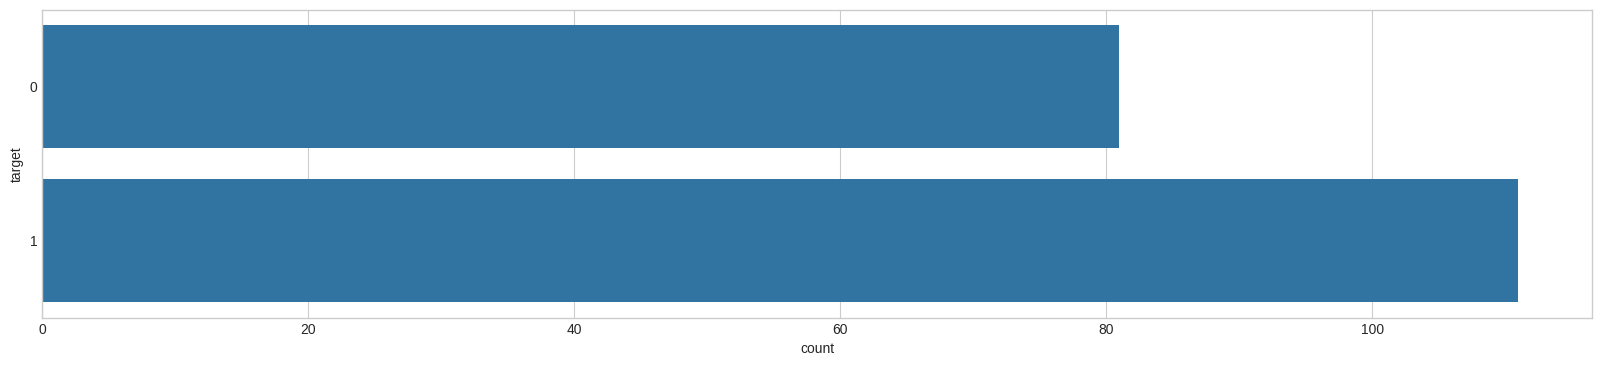

In [ ]:
fig = plt.figure(figsize=(20,4))
sns.countplot(y='target', data=df_downsampled);
print(df_downsampled.target.value_counts())

## Feature: Age

<Axes: xlabel='age', ylabel='Density'>

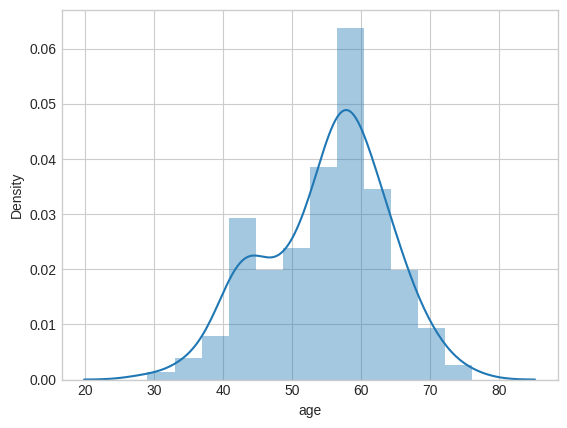

In [ ]:
sns.distplot(df_downsampled.age)

In [ ]:
# Let's add this to our subset dataframes
df_bin['age'] = df_downsampled['age']
df_con['age'] = df_downsampled['age']

## Feature: cp (chest pain type)

Keys:

0 = typical angina (jenis paling umum --> ada gejala yang bisa diprediksi misal naik tangga menyebabkan nyeri dada)

1 = atypical angina (gejala lebih parah, kurang bisa diprediksi, dan berlangsung lebih lama)

2 = non-anginal pain (nyeri pada dada namun bukan karena penyakit jantung)

3 = asymptomatic (tidak sadar atau tidak ada nyeri di dada)

Angina merupakan jenis nyeri dada

0    90
2    53
1    37
3    12
Name: cp, dtype: int64


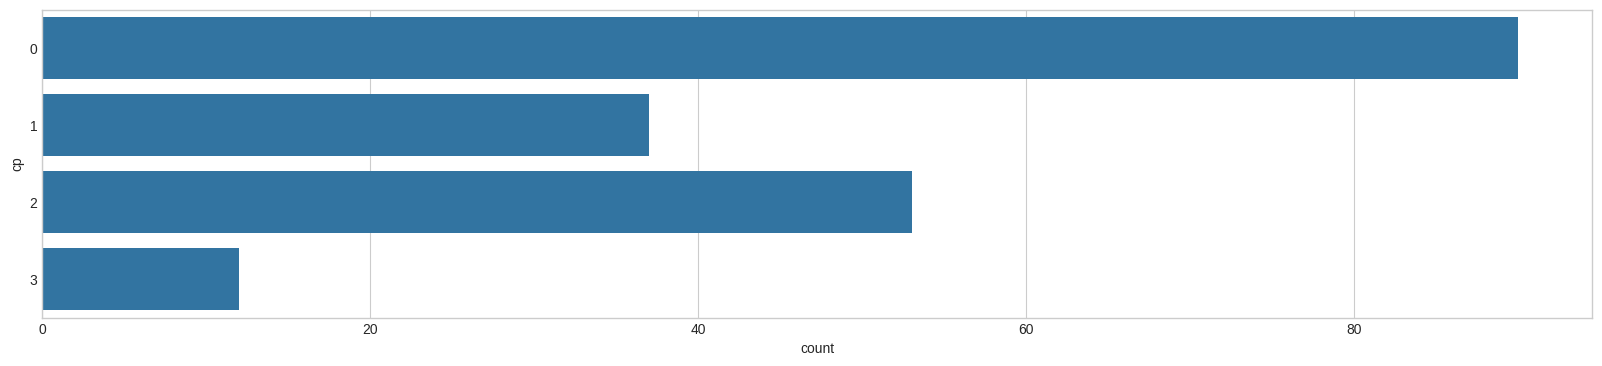

In [ ]:
fig = plt.figure(figsize=(20,4))
sns.countplot(y='cp', data=df_downsampled);
print(df_downsampled.cp.value_counts())

In [ ]:
# Let's add this to our subset dataframes
df_bin['cp'] = df_downsampled['cp']
df_con['cp'] = df_downsampled['cp']

## Feature: trestbps (stand for resting blood pressure)

<Axes: xlabel='trestbps', ylabel='Density'>

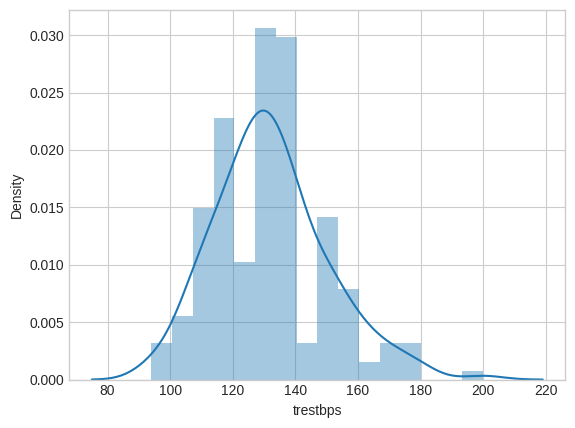

In [ ]:
sns.distplot(df_downsampled.trestbps)

In [ ]:
# Let's add this to our subset dataframes
df_bin['trestbps'] = df_downsampled['trestbps']
df_con['trestbps'] = df_downsampled['trestbps']

## Feature: chol (serum cholestrerol (mg/dl))

<Axes: xlabel='chol', ylabel='Density'>

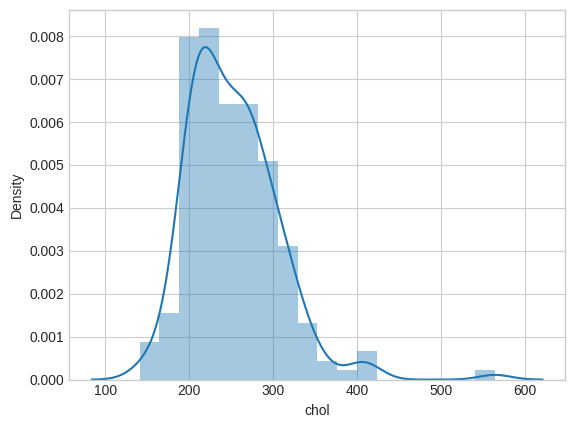

In [ ]:
sns.distplot(df_downsampled.chol)

In [ ]:
df_bin['chol'] = df_downsampled['chol']
df_con['chol'] = df_downsampled['chol']

## Feature: fbs

Description: fbs is stand for fasting blood sugar yang nilainya > 120 mg/dl

Keys : 0 = False, 1 = True

0    161
1     31
Name: fbs, dtype: int64


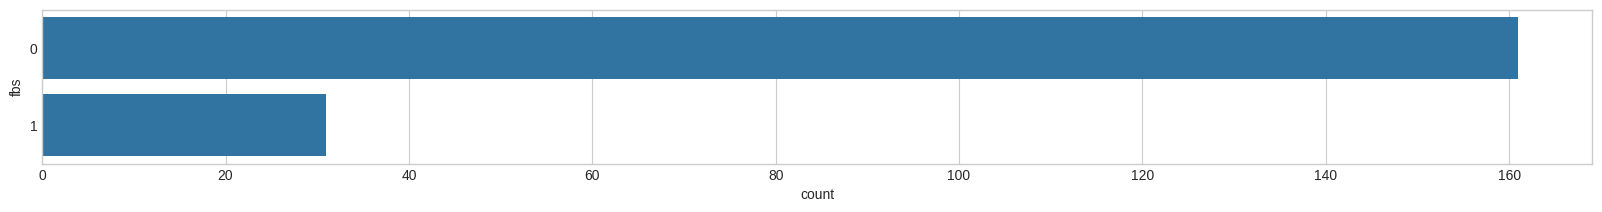

In [ ]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='fbs', data=df_downsampled);
print(df_downsampled.fbs.value_counts())

In [ ]:
df_bin['fbs'] = df_downsampled['fbs']
df_con['fbs'] = df_downsampled['fbs']

##Feature: restecg

Description : Resting electrocardiographic measurement = perubahan karakteristik dalam gelombang ST-T dalam keadaan istirahat

Key

0 = normal

1 = having ST-T wave abnormally

Gelombang ST normalnya datar
Gelombang T normalnya bernilai + (mengarah ke atas)

2 = showing probable or definite left ventricular hypertrophy by Estes'criteria (kemungkinan adanya pembesaran atau penebalan otot pada dinding ventrikel kiri jantung)



1    94
0    94
2     4
Name: restecg, dtype: int64


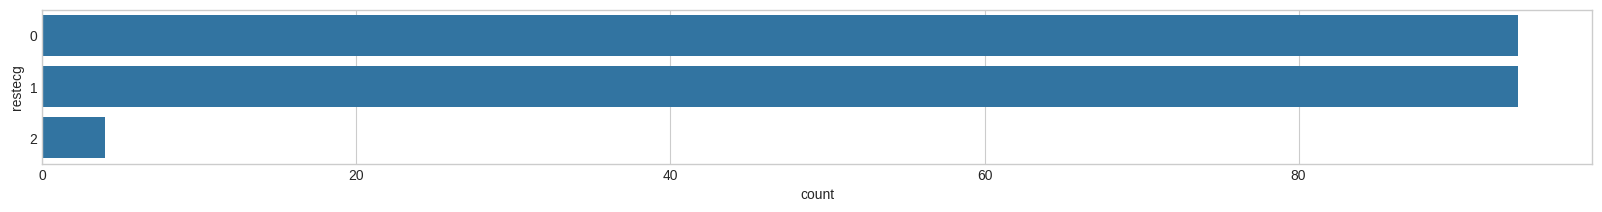

In [ ]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='restecg', data=df_downsampled);
print(df_downsampled.restecg.value_counts())

In [ ]:
df_bin['restecg'] = df_downsampled['restecg']
df_con['restecg'] = df_downsampled['restecg']

## Feature : thalach (The person's maximum heart rate achieved)

<Axes: xlabel='thalach', ylabel='Density'>

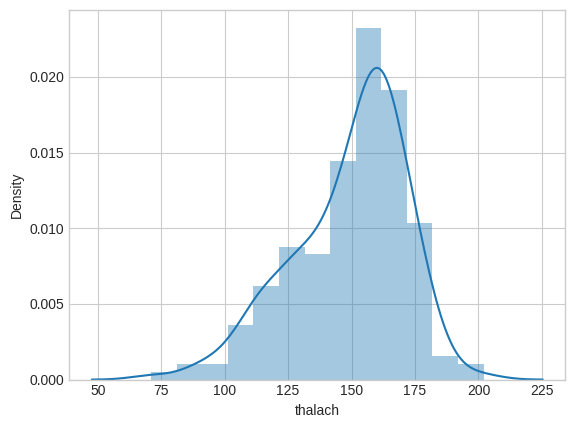

In [ ]:
sns.distplot(df_downsampled.thalach)

In [ ]:
df_bin['thalach'] = df_downsampled['thalach']
df_con['thalach'] = df_downsampled['thalach']

## Feature : exang

Description : exercise induced angina (apakah exercie menyebabkan nyeri dada atau tidak)

Key : 0 = No, 1 = Yes

0    132
1     60
Name: exang, dtype: int64


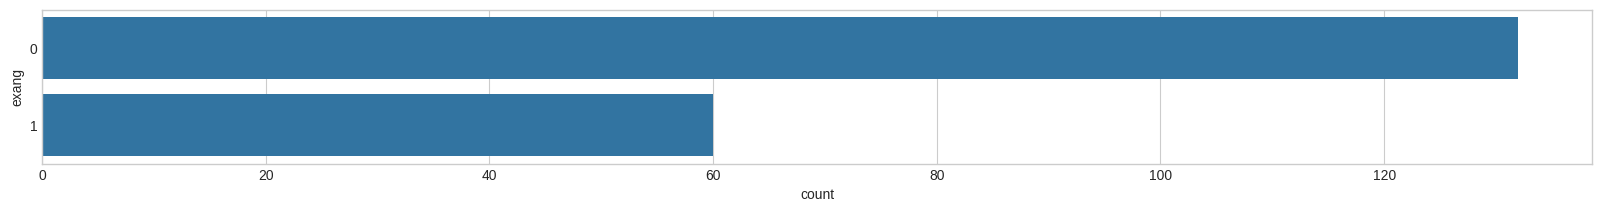

In [ ]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='exang', data=df_downsampled);
print(df_downsampled.exang.value_counts())

In [ ]:
df_bin['exang'] = df_downsampled['exang']
df_con['exang'] = df_downsampled['exang']

### Feature : oldpeak

Description : ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

<Axes: xlabel='oldpeak', ylabel='Density'>

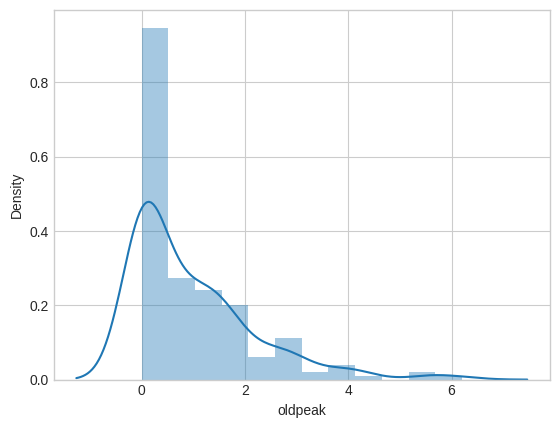

In [ ]:
sns.distplot(df_downsampled.oldpeak)

In [ ]:
df_bin['oldpeak'] = df_downsampled['oldpeak']
df_con['oldpeak'] = df_downsampled['oldpeak']

## Feature : slope

Description : the slope of the peak exercise ST segment

Keys :

0 = uslopping (miring ke atas) --> indikasi yang baik dari iskemis miokard (kurangnya aliran darah ke jantung selama aktivitas fisik)

1 = flat (dapat menjadi tanda iskemia namun kurnag spesifik)

2 = downsloping (tanda paling kiat iskemia miokard)

iskemia miokard = kondisi dimana aliran darah ke otot jantung (miokardium) terbatas atau terhambar

2    95
1    86
0    11
Name: slope, dtype: int64


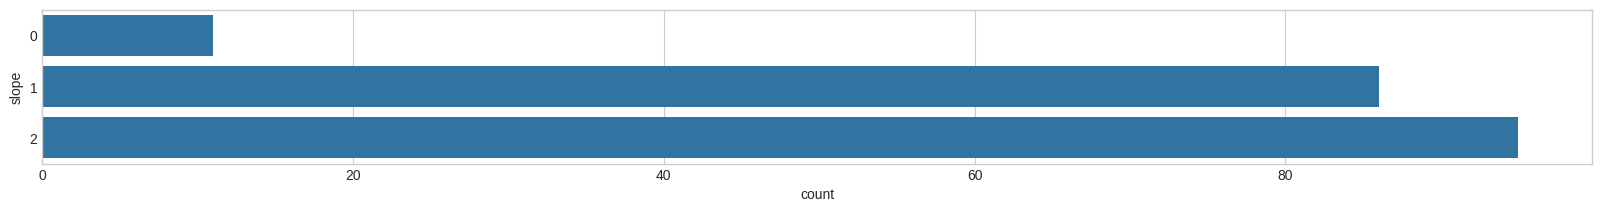

In [ ]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='slope', data=df_downsampled);
print(df_downsampled.slope.value_counts())

In [ ]:
df_bin['slope'] = df_downsampled['slope']
df_con['slope'] = df_downsampled['slope']

## Feature : ca

Description : the number of major vessels (merujuk pada jumlah pembuluh darah besar yang terlihat --> semkain tinggi jumlahnya semakin baik)

Keys:

0 = tidak ada pembuluh darah utama yang terlihat

1 = satu pembuluh darah besar tampak

2 = dua pembuluh darah besar tampak

3 = tiga pembuluh darah besar tampak

4 = empat pembuluh darah besar tampak

0    119
1     36
2     28
3      8
4      1
Name: ca, dtype: int64


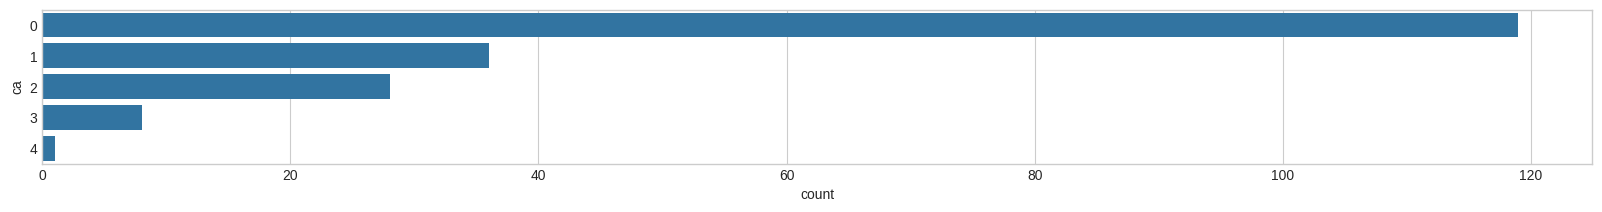

In [ ]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='ca', data=df_downsampled);
print(df_downsampled.ca.value_counts())

In [ ]:
df_bin['ca'] = df_downsampled['ca']
df_con['ca'] = df_downsampled['ca']

## Feature : thal

Description : a blood disorder called thalassemia

Keys :
0 = tiadak ada gejala thalassemia terdeteksi

1 = thalasemia ringan, tidak perlu perawatan khusus

2 = thalasemia sedang, perlu perawatan medis ruin

3 = thalasemia berat, perlu perawatan intensif



2    110
3     72
1      8
0      2
Name: thal, dtype: int64


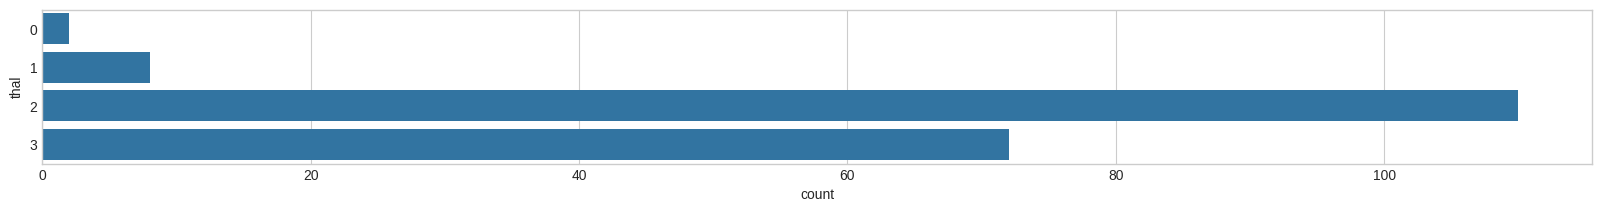

In [ ]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='thal', data=df_downsampled);
print(df_downsampled.thal.value_counts())

In [ ]:
df_bin['thal'] = df_downsampled['thal']
df_con['thal'] = df_downsampled['thal']

In [ ]:
# Function to create count and distribution visualizations

def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws={"label": "Heart Disease"});
        sns.distplot(data.loc[data[label_column] == 0][target_column],
                     kde_kws={"label": "No"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column],
                     kde_kws={"label": "Heart Disease"});
        sns.distplot(data.loc[data[label_column] == 0][target_column],
                     kde_kws={"label": "No"});

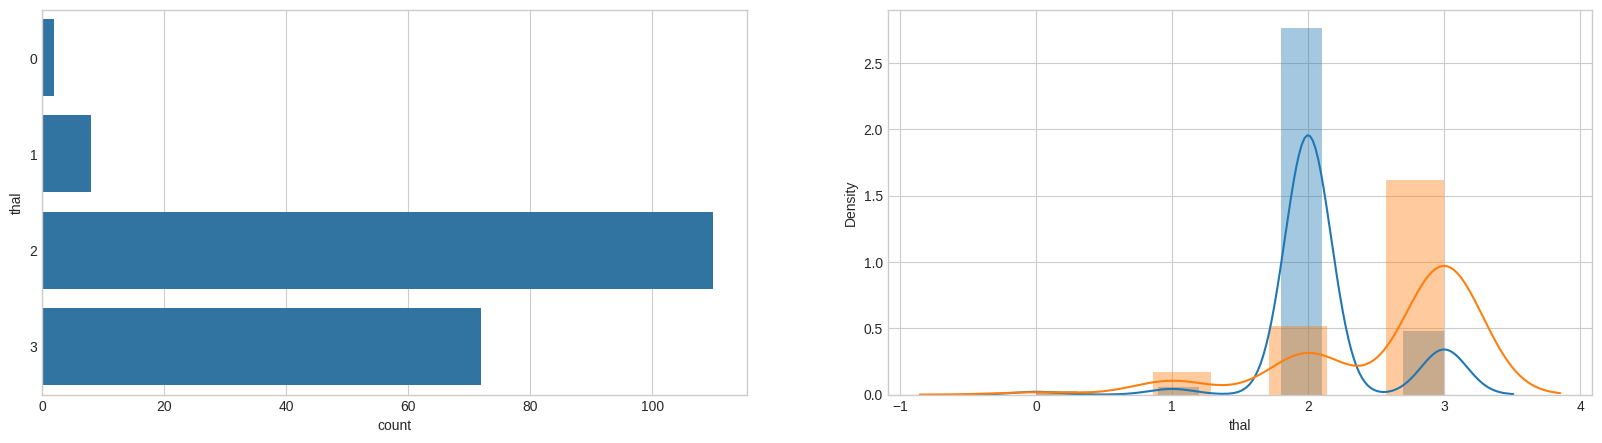

In [ ]:
# Visualise the counts of thal and the distribution of the values
# against Disease
plot_count_dist(df_downsampled,
                bin_df=df_bin,
                label_column='target',
                target_column='thal',
                figsize=(20, 5))

## Analisis multivariat

In [ ]:
df_corr = df_downsampled.corr()
df_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.08,-0.00,0.30,0.20,0.07,-0.06,-0.43,0.07,0.19,-0.10,0.35,0.09,-0.25
sex,-0.08,1.00,-0.11,-0.05,-0.16,0.10,-0.08,-0.09,0.18,0.08,0.02,0.08,0.31,-0.35
cp,-0.00,-0.11,1.00,0.02,0.01,-0.03,0.02,0.22,-0.43,-0.28,0.22,-0.25,-0.15,0.43
trestbps,0.30,-0.05,0.02,1.00,0.16,0.13,-0.12,-0.18,0.14,0.20,-0.20,0.14,0.09,-0.29
chol,0.20,-0.16,0.01,0.16,1.00,0.07,-0.19,-0.04,0.01,0.05,-0.02,0.07,0.06,-0.07
fbs,0.07,0.10,-0.03,0.13,0.07,1.00,-0.12,-0.07,0.13,0.03,0.01,0.26,0.03,-0.11
restecg,-0.06,-0.08,0.02,-0.12,-0.19,-0.12,1.00,0.04,-0.04,-0.07,0.09,-0.08,-0.11,0.18
thalach,-0.43,-0.09,0.22,-0.18,-0.04,-0.07,0.04,1.00,-0.30,-0.31,0.41,-0.15,-0.13,0.41
exang,0.07,0.18,-0.43,0.14,0.01,0.13,-0.04,-0.30,1.00,0.30,-0.19,0.13,0.25,-0.47
oldpeak,0.19,0.08,-0.28,0.20,0.05,0.03,-0.07,-0.31,0.30,1.00,-0.59,0.32,0.26,-0.44


Berdasarkan hasil korelasi di atas, terdapat beberapa faktor yang memengaruhi "target" (seseorang terkena heart disease)

1. target berkorelasi positif dengan cp (chest pain type) dengan nilai 0.45
2. target berkorelasi positif dengan thalach (The person's maximum heart rate achieved) dengan nilai 0.38
3. target berkorelasi positif dengan slope (indikasi seseorang terkena iskemis miokard)

Selain itu, terdapat beberapa faktor yang saling berkorelasi positif satu sama lain

1. trestbps (resting blood pressure) dengan age = 0.37               
2. thalach dengan slope = 0.34                                     
3. thal dengan sex = 0.29
4. chol dengan sex = 0.27
5. ca dengan age = 0.27

fitur **age** dipengaruhi oleh **trestbps dan ca** (jumlah pembuluh darah besar yang abnormal)

fitur **sex** dipengaruhi oleh **thal** (thalassemia) dan **chol** (kolesterol)

# **Feature Engineering**

Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membantu bisnis ecommerce dalam menghadapi tantangan bisnis yang ada.
Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.

## Feature Engineering hasil dari EDA

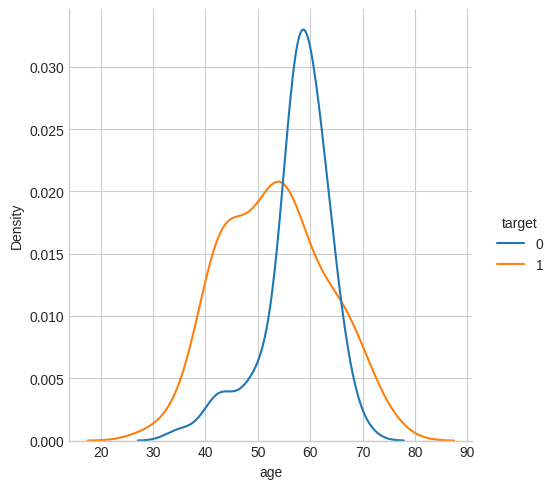

In [ ]:
sns.displot(df_downsampled, x="age", hue="target", kind="kde")

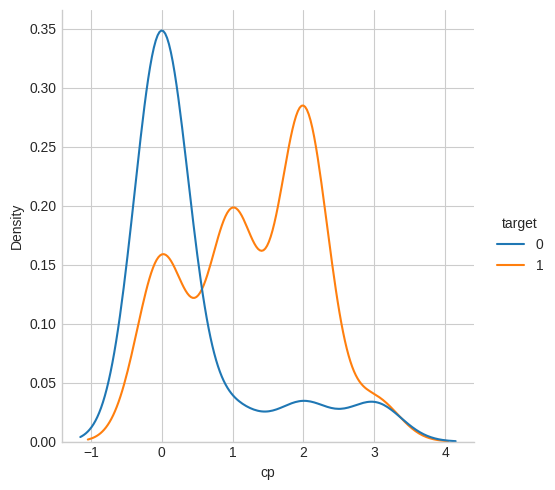

In [ ]:
sns.displot(df_downsampled, x="cp", hue="target", kind="kde")

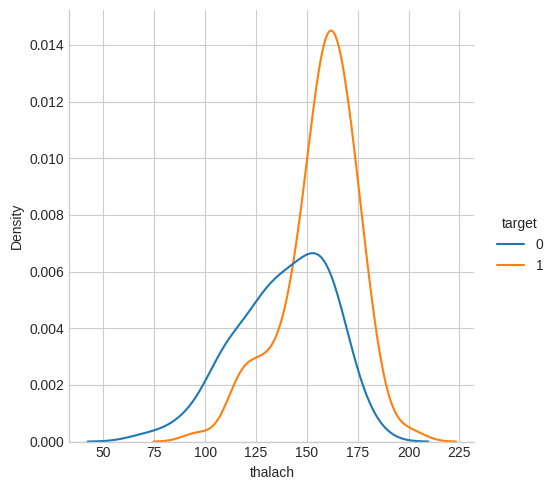

In [ ]:
sns.displot(df_downsampled, x="thalach", hue="target", kind="kde")

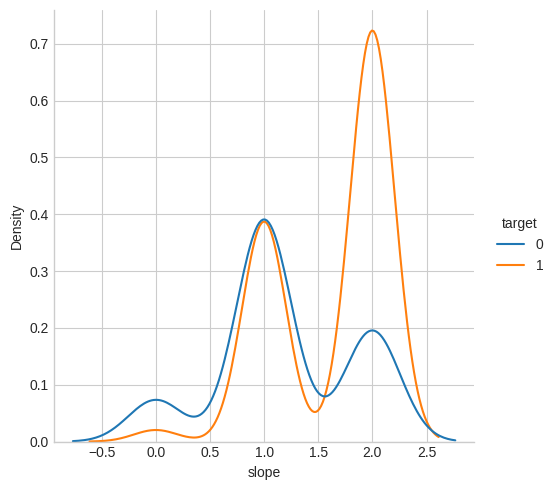

In [ ]:
sns.displot(df_downsampled, x="slope", hue="target", kind="kde")

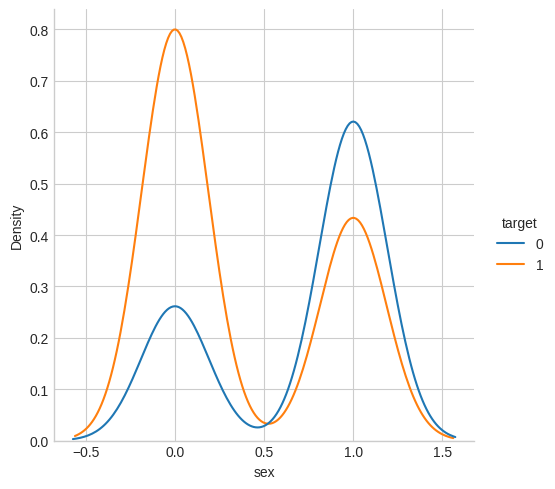

In [ ]:
sns.displot(df_downsampled, x="sex", hue="target", kind="kde")

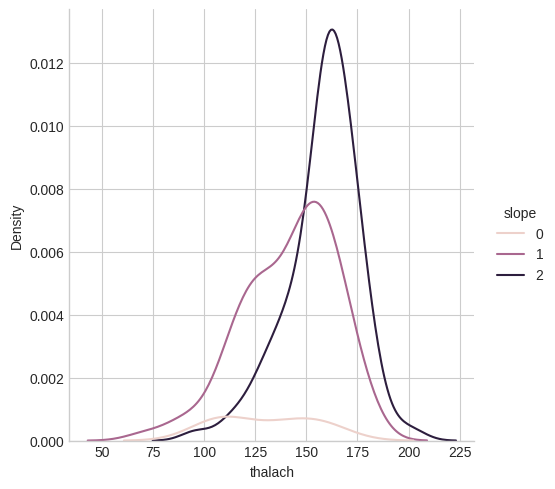

In [ ]:
sns.displot(df_downsampled, x="thalach", hue="slope", kind="kde")

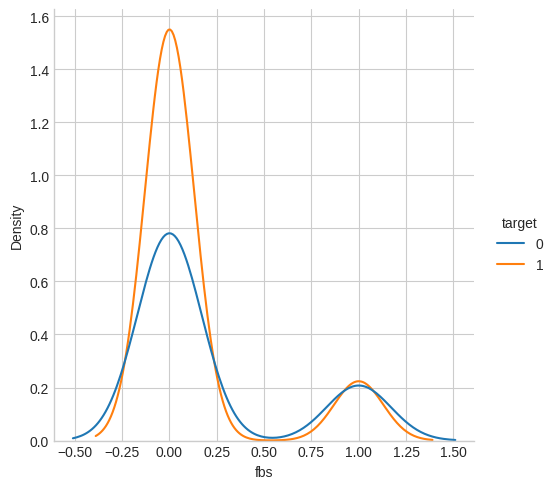

In [ ]:
sns.displot(df_downsampled, x="fbs", hue="target", kind="kde")

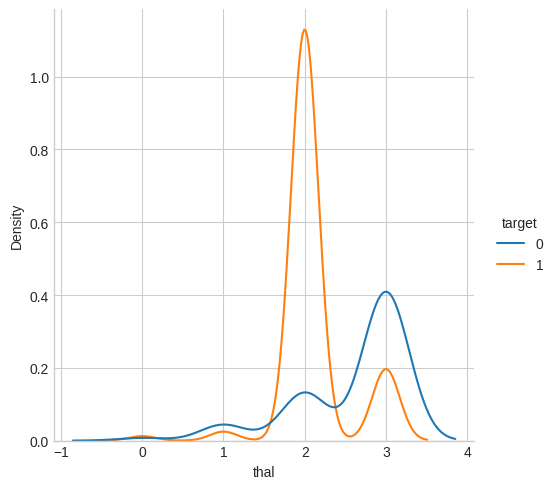

In [ ]:
sns.displot(df_downsampled, x="thal", hue="target", kind="kde")

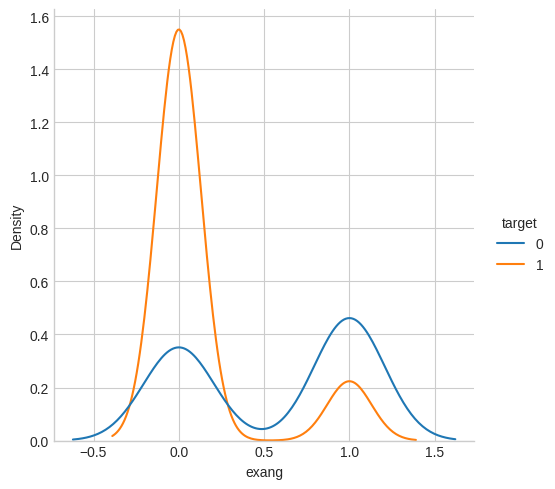

In [ ]:
sns.displot(df_downsampled, x="exang", hue="target", kind="kde")

## Feature Engineering dari hasil modelling

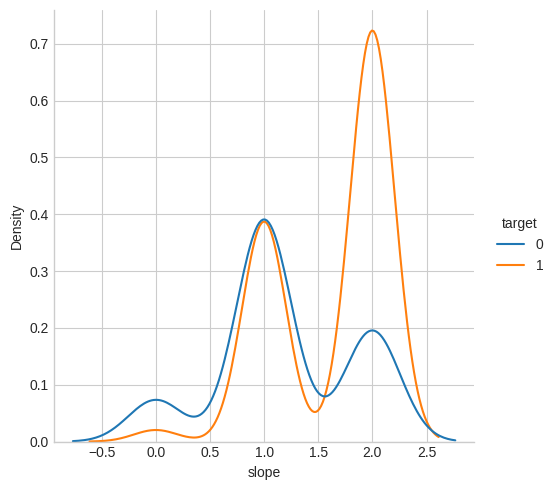

In [ ]:
sns.displot(df_downsampled, x="slope", hue="target", kind="kde")

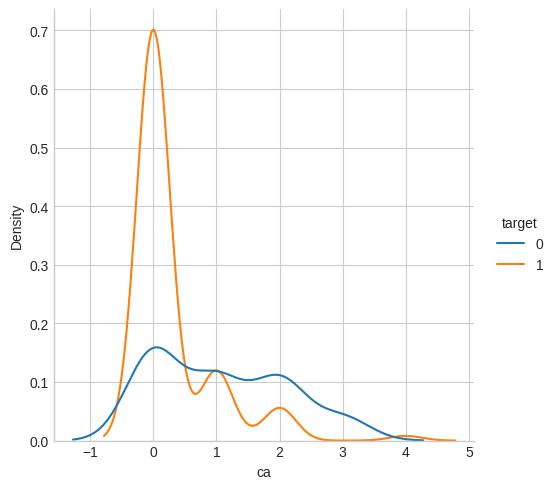

In [ ]:
sns.displot(df_downsampled, x="ca", hue="target", kind="kde")

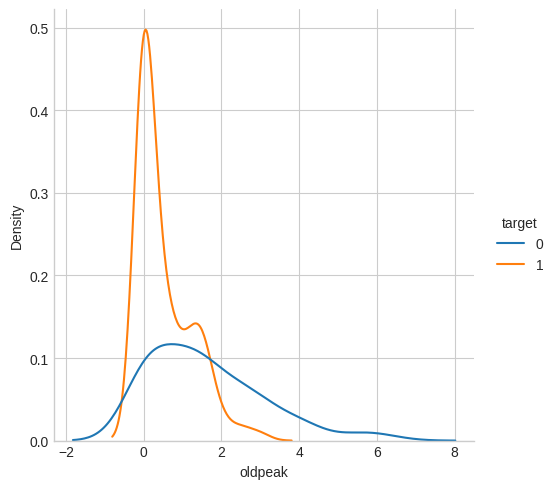

In [ ]:
sns.displot(df_downsampled, x="oldpeak", hue="target", kind="kde")

# **Modelling**

## Supervised Learning

Pemodelan pada daset ini termasuk supervised learning karena output sudah ditentukan yang terdapat pada kolom 'target'. Supervised learning terbagi menjadi 2 teknik, yaitu Classification dan Regression. Pada dataset dipilih teknik classification.

In [ ]:
# Assuming your target column is named 'target'
X = df_downsampled.drop('target', axis=1)
y = df_downsampled['target']

In [ ]:
y

85     1
116    0
107    0
237    0
60     1
      ..
652    1
691    1
708    1
723    1
733    1
Name: target, Length: 192, dtype: int64

In [ ]:
# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# test_size = 0,25 --> 20:80 (data_train:data_testing)
# random_test = parameter untuk mengontrol RANDOMNESS --> agar pembagian data tetap

In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
102,54,1,1,108,309,0,1,156,0,0.0,2,0,3
173,39,0,2,94,199,0,1,179,0,0.0,2,0,2
41,54,1,2,120,258,0,0,147,0,0.4,1,0,3
234,49,0,0,130,269,0,1,163,0,0.0,2,0,2
48,66,0,2,146,278,0,0,152,0,0.0,1,1,2
472,58,0,0,130,197,0,1,131,0,0.6,1,0,2
193,69,1,3,160,234,1,0,131,0,0.1,1,1,2
191,56,1,1,130,221,0,0,163,0,0.0,2,0,3
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2
77,63,1,0,140,187,0,0,144,1,4.0,2,2,3


In [ ]:
y_test

102    1
173    1
41     1
234    1
48     1
472    1
193    1
191    1
149    1
77     0
34     1
47     0
14     0
366    0
286    1
301    1
240    1
184    1
44     1
580    1
425    0
287    1
87     0
10     1
616    1
51     0
1      0
309    1
63     1
227    1
50     1
349    0
85     1
606    0
421    1
225    1
158    1
233    1
342    1
74     0
40     1
321    1
54     0
169    1
65     0
566    1
16     1
291    0
Name: target, dtype: int64

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [ ]:
# Buat nyari tahu perbedaan nilai 'target' pada y_test dan evaluasi matrix
#            singkatnya metode mana yg hasilnya bagus --> nilai actual sama confusion matrix salahnya sedikit
#

actual = y_test  # Actual target values
# Create confusion matrices
knn_cm = confusion_matrix(actual, knn_pred)
dt_cm = confusion_matrix(actual, dt_pred)
rf_cm = confusion_matrix(actual, rf_pred)
xgb_cm = confusion_matrix(actual, xgb_pred)

# Convert confusion matrices to DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
knn_cm_df = confusion_matrix_to_dataframe(knn_cm)
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)
xgb_cm_df = confusion_matrix_to_dataframe(xgb_cm)

In [ ]:
knn_cm

array([[ 7,  7],
       [11, 23]])

In [ ]:
knn_cm_df

Predicted,0,1
Actual,,
0,7,7
1,11,23


In [ ]:
dt_cm_df

Predicted,0,1
Actual,,
0,12,2
1,14,20


In [ ]:
rf_cm_df

Predicted,0,1
Actual,,
0,13,1
1,3,31


In [ ]:
xgb_cm_df

Predicted,0,1
Actual,,
0,13,1
1,4,30


In [ ]:
def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, accuracy, precision, recall, f1


# Evaluate KNN
knn_cm, knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate(y_test, knn_pred)

# Evaluate Decision Tree
dt_cm, dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate(y_test, dt_pred)

# Evaluate Random Forest
rf_cm, rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate(y_test, rf_pred)

# Evaluate XGBoost
xgb_cm, xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate(y_test, xgb_pred)

In [ ]:
knn_f1

0.63671875

In [ ]:
dt_f1

0.6809523809523809

In [ ]:
rf_f1

0.9181818181818183

In [ ]:
xgb_f1

0.8984698097601322

In [ ]:
# Nyari faktor mana yang berpengaruh ke "target"-nya

rf_feature_importance = rf.feature_importances_
feature_names = X.columns

rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df

,Feature,Importance
2,cp,0.141180
12,thal,0.138360
0,age,0.113472
7,thalach,0.109470
4,chol,0.096301
9,oldpeak,0.096201
3,trestbps,0.080257
11,ca,0.075522
1,sex,0.054070
8,exang,0.042217


## Load new data

In [ ]:
new_data = pd.read_csv('/content/drive/MyDrive/#MSIB/Startup Campus/data set - SC/heart.csv')
ndf = new_data.drop('target', axis = 1)

In [ ]:
# Assuming your new data has the same features as your original data (except the target)

# Make predictions using the trained models
knn_predictions = knn.predict(ndf)
dt_predictions = dt.predict(ndf)
rf_predictions = rf.predict(ndf)
xgb_predictions = xgb_model.predict(ndf)


combined_data = new_data.copy()  # Copy the new dataset

# Add columns for predicted labels
combined_data['KNN_Predictions'] = knn_predictions
combined_data['DT_Predictions'] = dt_predictions
combined_data['RF_Predictions'] = rf_predictions
combined_data['XGB_Predictions'] = xgb_predictions

In [ ]:
combined_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,KNN_Predictions,DT_Predictions,RF_Predictions,XGB_Predictions
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1,0,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1,0,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,0,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1,0,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,1,1,1,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,1,0,0,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,0,0,0,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1,1,1,1


In [ ]:
cmb = combined_data.drop_duplicates()
cmb

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,KNN_Predictions,DT_Predictions,RF_Predictions,XGB_Predictions
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1,0,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1,0,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,0,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1,0,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,0,1,1,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1,1,1,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1,0,0,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,0,0,0,0


In [ ]:
cmb[cmb['target'] == 1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,KNN_Predictions,DT_Predictions,RF_Predictions,XGB_Predictions
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1,1,1,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,0,0,1,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,1,1,1,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,0,0,1,1
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1,1,1,1,1
708,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1,1,1,1,1
719,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1,0,1,0,0
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,0,1,1,1


In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
new_data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
result_female = cmb[(cmb['target'] == 1) & (cmb['sex'] == 0)]
result_female

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,KNN_Predictions,DT_Predictions,RF_Predictions,XGB_Predictions
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1,1,1,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,0,0,1,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,1,1,1,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,0,0,1,1
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1,0,1,1,1
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1,1,1,1,1
708,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1,1,1,1,1
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,0,1,1,1


In [ ]:
result_male = df_downsampled[(df_downsampled['target'] == 1) & (df_downsampled['sex'] == 1)]
result_male

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
225,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
193,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
191,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
616,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
231,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
